In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pickle
import random

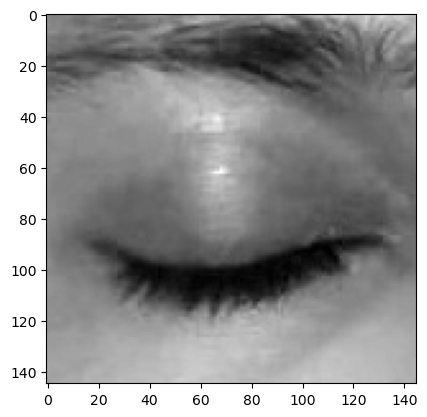

In [2]:
img_array = cv2.imread("dataset_new/train/Closed/_0.jpg",cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array,cmap="gray")

In [3]:
img_array.shape

(145, 145)

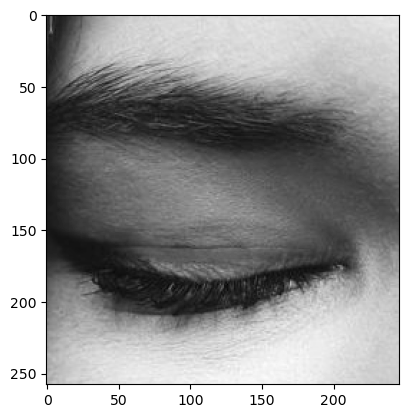

In [4]:
datadir = "dataset_new/train/" ## training dataset
classes = ['Closed','Open'] # List of the classed
for category in classes:
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

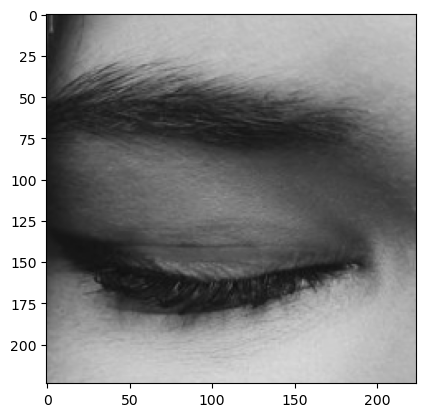

In [5]:
img_size = 224
new_array = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

### Reading all the images and converting them into an array for data and labels

In [6]:
training_data = []

def create_training_data():
    for category in classes:
        path = os.path.join(datadir,category)
        class_num = classes.index(category)  ## 0 - Closed & 1 - Open
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [7]:
create_training_data()

In [8]:
print(len(training_data))

1234


In [9]:
random.shuffle(training_data)

In [10]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size,img_size, 3)

In [11]:
X.shape

(1234, 224, 224, 3)

In [12]:
# normalize the data
X = X/255.0

In [13]:
Y = np.array(y)

In [14]:
Y.shape

(1234,)

In [15]:
pickle_out = open("X.pickle",'wb')
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle",'wb')
pickle.dump(y,pickle_out)
pickle_out.close()


In [16]:
#pickle_in = open("X.pickle",'rb')
#X = pickle.load(pickle_in)

#pickle_in = open("y.pickle",'rb')
#y = pickle.load(pickle_in)

### Deep learning model for training - Transfer Learning

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
model = tf.keras.applications.mobilenet.MobileNet()

Metal device set to: Apple M1


In [19]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

### Transfer Learning

In [20]:
base_input = model.layers[0].input  ## input

In [21]:
base_output = model.layers[-4].output ## output

In [22]:
flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layer)  ## one node (1/0)
final_out = layers.Activation('sigmoid')(final_output)

In [23]:
new_model = keras.Model(inputs = base_input, outputs = final_out)

In [24]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

### Setting for binary classification (Closed/Open)

In [25]:
new_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics=["accuracy"])

In [83]:
new_model.fit(X,Y, epochs = 5, validation_split = 0.2,batch_size=1) ## training

Epoch 1/5
987/987 [==============================] - 32s 31ms/step - loss: 0.0929 - accuracy: 0.9645 - val_loss: 0.2845 - val_accuracy: 0.9069
Epoch 2/5
987/987 [==============================] - 28s 29ms/step - loss: 0.0363 - accuracy: 0.9899 - val_loss: 1.6293 - val_accuracy: 0.5911
Epoch 3/5
987/987 [==============================] - 28s 28ms/step - loss: 0.0711 - accuracy: 0.9767 - val_loss: 1.8729 - val_accuracy: 0.4615
Epoch 4/5
987/987 [==============================] - 28s 29ms/step - loss: 0.0704 - accuracy: 0.9767 - val_loss: 3.9939 - val_accuracy: 0.5466
Epoch 5/5
987/987 [==============================] - 28s 29ms/step - loss: 0.0386 - accuracy: 0.9889 - val_loss: 0.3465 - val_accuracy: 0.8219


In [84]:
## save the model after training
new_model.save('my_model.h5')

In [85]:
## loading the saved model
new_model  = tf.keras.models.load_model('my_model.h5')

### Checked the network for prediction

In [86]:
img_array = cv2.imread('_31.jpg',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb,(img_size,img_size))

X_input = np.array(new_array).reshape(1,img_size,img_size,3)

In [87]:
X_input.shape

(1, 224, 224, 3)

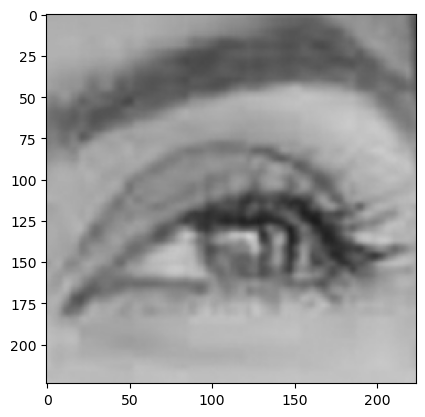

In [88]:
plt.imshow(new_array)

In [89]:
X_input=X_input/255.0 # noemalize the array

In [90]:
prediction = new_model.predict(X_input)

1/1 [==============================] - 0s 391ms/step


In [91]:
prediction

array([[0.2515907]], dtype=float32)

In [118]:
img_array = cv2.imread('_115.jpg',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb,(img_size,img_size))

X_input1 = np.array(new_array).reshape(1,img_size,img_size,3)
X_input1.shape


(1, 224, 224, 3)

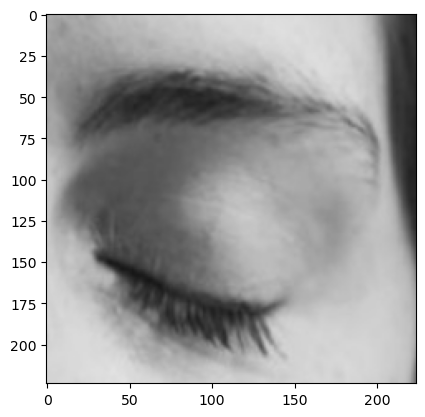

In [119]:
plt.imshow(new_array)
X_input1=X_input1/255.0 # noemalize the array

In [120]:
prediction1 = new_model.predict(X_input1)
prediction1

1/1 [==============================] - 0s 21ms/step


array([[0.18778877]], dtype=float32)

### Lets predect on unkown images

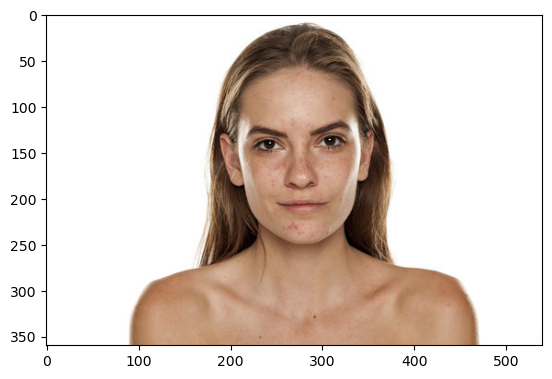

In [95]:
imgu = cv2.imread("31.jpg")
plt.imshow(cv2.cvtColor(imgu, cv2.COLOR_BGR2RGB))

In [96]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [97]:
gray = cv2.cvtColor(imgu, cv2.COLOR_BGR2GRAY)

In [98]:
eyes = eyeCascade.detectMultiScale(gray,1.1,4)
face = faceCascade.detectMultiScale(gray,1.1,4)

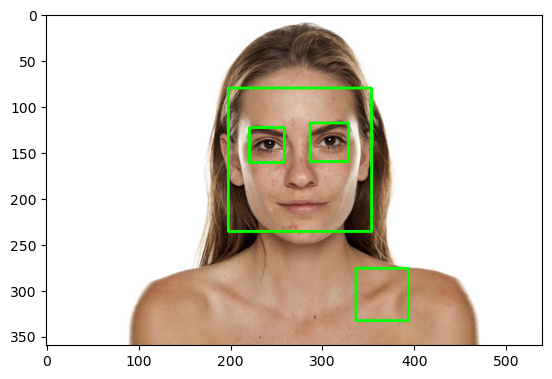

In [99]:
for (e, f, g, h) in face:
        cv2.rectangle(imgu, (e, f), (e+g, f+h), (0, 255, 0),2)
for(x ,y, w, h) in eyes:
    cv2.rectangle(imgu, (x, y), (x+w, y+h),(0, 255, 0), 2)
    
plt.imshow(cv2.cvtColor(imgu, cv2.COLOR_BGR2RGB))

In [100]:
## cropping the eye

In [101]:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(imgu, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray,1.1,4)
for a,b,c,d in eyes:
    roi_gray = gray[b:b+d, a:a+c]
    roi_color = imgu[b:b+d, a:a+c]
    eye = eyeCascade.detectMultiScale(roi_gray)
    if len(eye) == 0:
        print("Eyes are not detected")
    else:
        for (ea,eb,ec,ed) in eye:
            eye_roi = roi_color[eb: eb+ed, ea: ea+ec]

In [102]:
eye_roi.shape

(28, 28, 3)

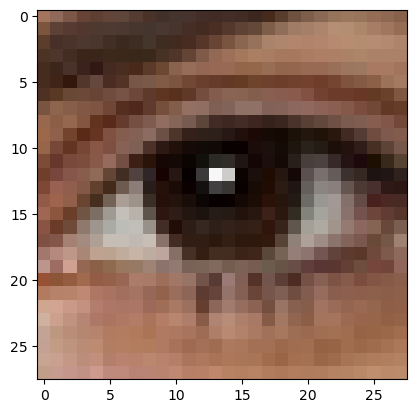

In [103]:
plt.imshow(cv2.cvtColor(eye_roi,cv2.COLOR_BGR2RGB))

In [104]:
final_image = cv2.resize(eye_roi,(224,224))
final_image = np.expand_dims(final_image,axis=0)
final_image = final_image/225.0
final_image.shape

(1, 224, 224, 3)

In [105]:
new_model.predict(final_image)

1/1 [==============================] - 0s 26ms/step


array([[0.9996743]], dtype=float32)

In [49]:
import tensorflow as tf
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [50]:
cat = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflitemodel = cat.convert()

INFO:tensorflow:Assets written to: /var/folders/t7/p21fqkmj1blcr482p5y12s2w0000gn/T/tmpnv5slh54/assets


INFO:tensorflow:Assets written to: /var/folders/t7/p21fqkmj1blcr482p5y12s2w0000gn/T/tmpnv5slh54/assets
2023-06-01 10:14:56.175232: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-06-01 10:14:56.175261: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.


In [51]:
open("driverdrowsiness_lite.tflite","wb").write(tflitemodel)

12804428